In this demonstration, we will be covering morphological operations like
convexhull, image thinning, hole filling and border clearning.

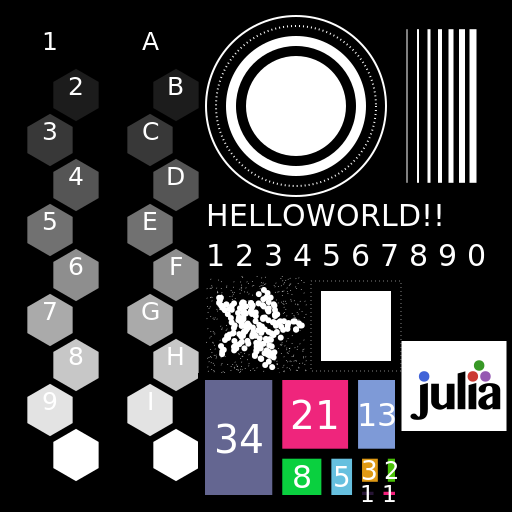

In [1]:
using Images, Noise, ImageMorphology
using HistogramThresholding
using MosaicViews, ImageDraw
using TestImages

img_src = testimage("morphology_test_512")

Thresholding of image

In [2]:
edges1, counts1 = build_histogram(Gray.(img_src), 256)
t1 = find_threshold(UnimodalRosin(), counts1[1:end], edges1)
img_input = zeros(Bool, axes(Gray.(img_src)))
for i in CartesianIndices(img_src)
    img_input[i] = Gray.(img_src[i]) < t1 ? 0 : 1
end
img_input

512×512 Matrix{Bool}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱  ⋮              ⋮              ⋮  
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     

This is the image that we will be using throughout this demonstration
in its boolean form as most of operations are applied on binary images.

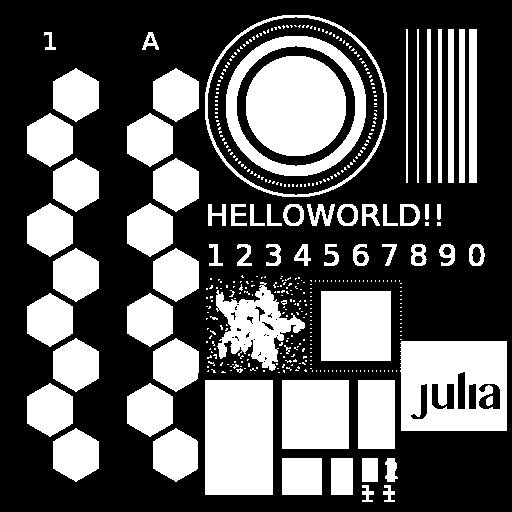

In [3]:
Gray.(img_input)

## Convex Hull

Convex Hull operation outer most cover-like boundary of a binary image and
returns the vertices of convex hull as a CartesianIndex array.

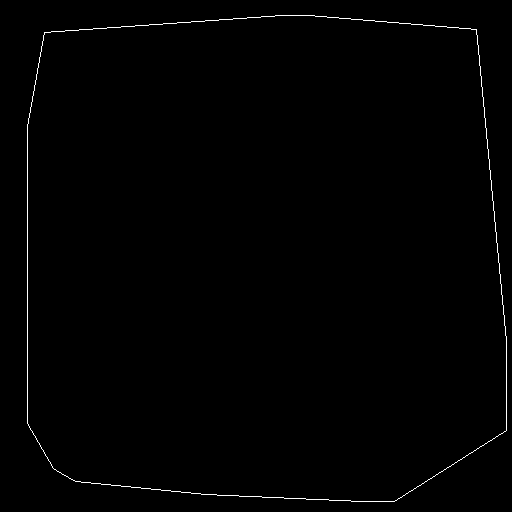

In [4]:
cordinates = convexhull(img_input)
push!(cordinates, cordinates[1])
img_convex_hull = zeros(RGB, axes(Gray.(img_src)))
draw!(img_convex_hull, Path(cordinates), RGB(1))
img_convex_hull

## Image Filling

 Image filling operation finds connected components of an image are found and
after filling objects that falls in the range of interval specified

For filling objects, represent the holes(part to be filled) with `true` in your array. Meaning color RGB(1)/black

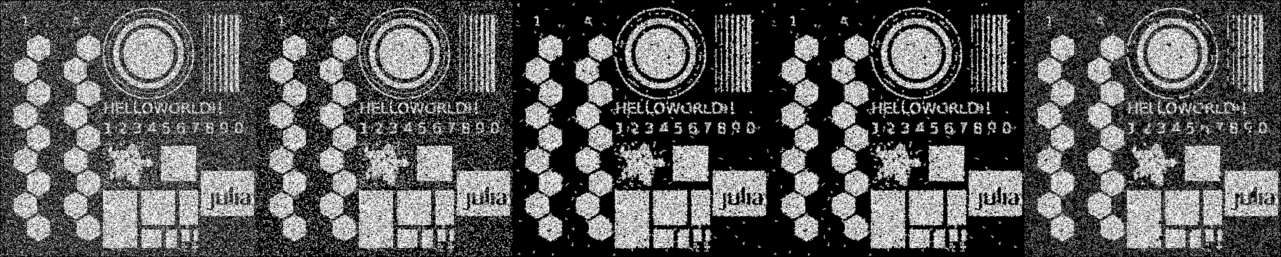

In [5]:
img_noise = salt_pepper(img_input, 0.5)
fill_image_1 = imfill(img_noise, (0.1, 1))
fill_image_2 = imfill(img_noise, (0.1, 10)) # this configuration gets us best results
fill_image_3 = imfill(img_noise, (1, 10))
fill_image_4 = imfill(img_noise, (5, 20))
Gray.([img_noise fill_image_1 fill_image_2 fill_image_3 fill_image_4])

## Image thinning

Thinning operation applies a binary blob thinning operation to achieve a skeletization of the input image.
Guo Algorith, decides which pixels to keep and which to remove using 3 rules given in original paper.

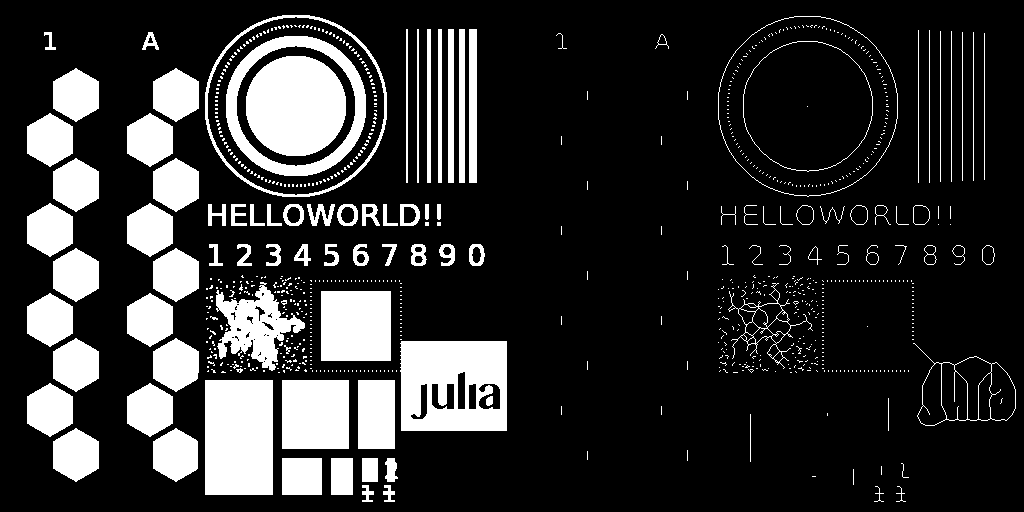

In [6]:
img_thinning = thinning(img_input, algo = GuoAlgo());
Gray.([img_input img_thinning])

## Clear Border

Clearborder method can be used to clear objects connected to the border of the image.

In [7]:
cleared_img_1 = clearborder(img_input, 20); # 20 is the width of border that's examined
cleared_img_2 = clearborder(img_input, 30); # notice how it remove the inner circle even if it's outside its range
cleared_img_3 = clearborder(img_input, 30, 1);

Default color for removal is 0 meaning remove RGB(0) but now since it's 1 it's clears the whole image due to flood fill algorithm

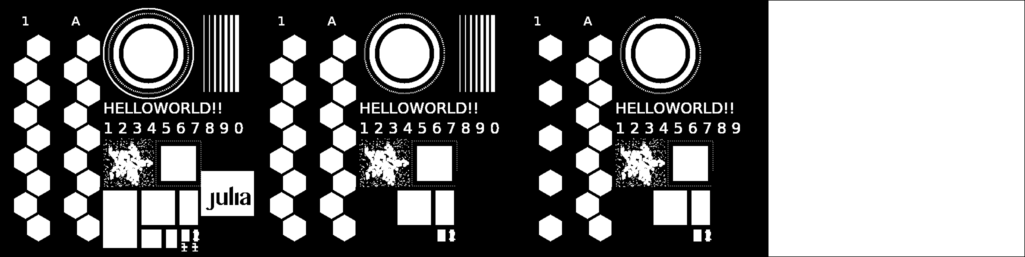

In [8]:
Gray.([img_input cleared_img_1 cleared_img_2 cleared_img_3])

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*